## TP 2 - SD-TSIA 204
**Ethan Barriol**

In [10]:
import os
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
!python --version

Python 3.10.12


In [12]:
fn1 = "ethan"
ln1 = "barriol"
filename = "_".join(map(lambda s: s.strip().lower(),
                    ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_barriol_ethan.ipynb


### Q1

In [13]:
california_housing = fetch_california_housing()

print("Feature names:", california_housing.feature_names)
print("Number of features (p):", len(california_housing.feature_names))
print("Number of samples (n):", california_housing.data.shape[0])

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Number of features (p): 8
Number of samples (n): 20640


In [14]:
def theta_hat(X, y):
    """Calculate the OLS estimate of theta."""
    return np.linalg.inv(X.T @ X) @ X.T @ y

def mse_homemade(X, y, coefficients):
    """Calculate the mean squared error of predictions."""
    predictions = X @ coefficients
    residuals = y - predictions
    mse = np.mean(residuals**2)
    return mse

def r2_homemade(X, y, coefficients):
    """Calculate the R-squared score of predictions."""
    predictions = X @ coefficients
    ss_residual = np.sum((y - predictions)**2)
    ss_total = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [15]:
X, y = california_housing.data, california_housing.target

X = np.c_[np.ones((X.shape[0], 1)), X]

theta_h = theta_hat(X, y)

mse_hm = mse_homemade(X, y, theta_h)
r2_hm = r2_homemade(X, y, theta_h)

# With a Sklearn Model

model = LinearRegression()
model.fit(X, y)

mse_sklearn = mean_squared_error(y, model.predict(X))
r2_sklearn = r2_score(y, model.predict(X))

print("MSE :", mse_hm)
print("R2  :", r2_hm)
print("MSE with a Sklearn Model :", mse_sklearn)
print("R2 with a Sklearn Model :", r2_sklearn)

MSE : 0.5243209861846071
R2  : 0.6062326851998051
MSE with a Sklearn Model : 0.524320986184607
R2 with a Sklearn Model : 0.6062326851998052


We have the same MSE and R2 when using sklearn and whithout using it.

In [16]:
def standard_errors(X, y, theta_h):
    """Calculate standard errors of the model coefficients."""
    predictions = X @ theta_h
    residuals = y - predictions
    mse = np.mean(residuals**2)
    var_covar_matrix = mse * np.linalg.inv(X.T @ X)
    standard_errors = np.sqrt(np.diagonal(var_covar_matrix))
    return standard_errors

def confidence_intervals(theta_h, standard_errors, alpha=0.05):
    """Calculate confidence intervals for the model coefficients."""
    n = len(y)
    dof = n - len(theta_h)
    t_value = t.ppf(1 - alpha / 2, dof)

    lower_bounds = theta_h - t_value * standard_errors
    upper_bounds = theta_h + t_value * standard_errors

    return lower_bounds, upper_bounds

# Supposons que X, y et theta_hat soient déjà définis
theta = theta_hat(X, y)

standard_errors_result = standard_errors(X, y, theta)

confidence_level = 0.95
alpha = 1 - confidence_level
lower_bounds, upper_bounds = confidence_intervals(theta, standard_errors_result, alpha)

# Afficher les résultats
print(f"Confidence Intervals at {confidence_level * 100}% level:")
for i, (lower, upper) in enumerate(zip(lower_bounds, upper_bounds)):
    print(f"C{i}: [{lower:.4f}, {upper:.4f}]")

Confidence Intervals at 95.0% level:
C0: [-38.2331, -35.6507]
C1: [0.4285, 0.4449]
C2: [0.0086, 0.0103]
C3: [-0.1189, -0.0958]
C4: [0.5899, 0.7002]
C5: [-0.0000, 0.0000]
C6: [-0.0047, -0.0028]
C7: [-0.4354, -0.4072]
C8: [-0.4493, -0.4198]


### Q2

In [17]:
df = pd.read_csv('data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [18]:
# (a) Split the data

target_column = df.columns[-1]
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# (b) Fit a regular OLS

ols_model = LinearRegression()
ols_model.fit(X_train_std, y_train)

# prediction on train set
y_train_pred = ols_model.predict(X_train_std)

# prediction on test set
y_test_pred = ols_model.predict(X_test_std)

# evaluation of the model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# results
print("OLS Model Evaluation:")
print("MSE on Training Set:", mse_train)
print("R2 on Training Set:", r2_train)
print("MSE on Test Set:", mse_test)
print("R2 on Test Set:", r2_test)

OLS Model Evaluation:
MSE on Training Set: 2817.7846750178046
R2 on Training Set: 0.5494049246392119
MSE on Test Set: 4124.3959634846315
R2 on Test Set: 0.1692078272517269


### Variable selection

Selected features :  [34, 57, 77, 120, 131, 162, 30, 74, 160, 165, 123, 172, 13]


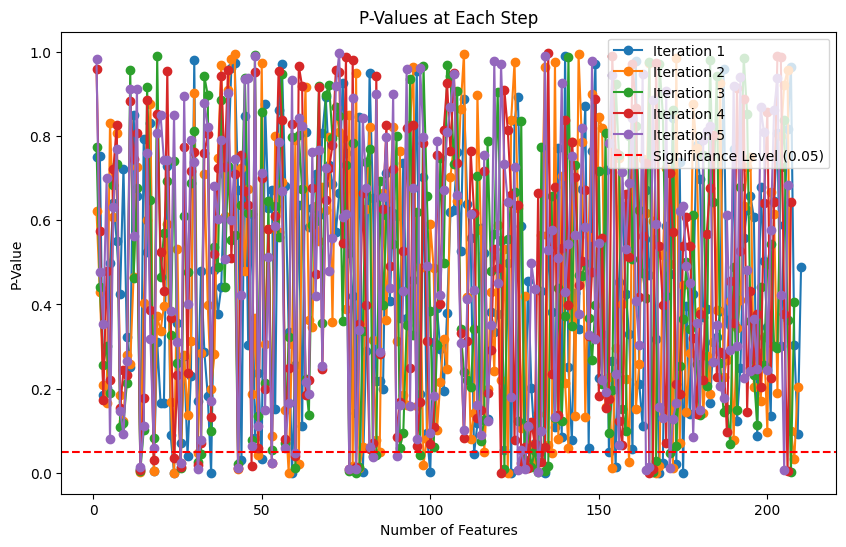

In [19]:
def fit_and_test_models(X, y):
    """Fit models and test each feature for significance."""
    min_p_value = np.inf
    best_feature = None
    all_p_values = []

    for i in range(X.shape[1]):
        model = LinearRegression().fit(X[:, [i]], y)
        predictions = model.predict(X[:, [i]])
        error = y - predictions
        degrees_of_freedom = len(y) - 2
        std_error = (np.sqrt(np.sum(error**2) / degrees_of_freedom) /
                     np.sqrt(np.sum((X[:, i] - X[:, i].mean())**2)))
        t_stat = model.coef_ / std_error
        p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=degrees_of_freedom))
        all_p_values.append(p_value[0])

        if p_value < min_p_value:
            min_p_value = p_value
            best_feature = i

    return best_feature, model.coef_, min_p_value, all_p_values

def forward_selection(X, y, significance_level=0.05):
    """Perform forward feature selection based on p-values."""
    if isinstance(X, pd.DataFrame):
        X = X.values  # Convert Pandas DataFrame to NumPy array

    num_features = X.shape[1]
    selected_features = []
    p_values = []
    y_residual = y.copy()
    n = 0
    first_all_p_values = []
    X_remaining = X.copy()

    while len(selected_features) < num_features:
        n += 1
        best_feature, _, min_p_value, all_p_values = fit_and_test_models(X_remaining, y_residual)

        if n <= 5:
            first_all_p_values.append(all_p_values)

        if best_feature is not None and min_p_value < significance_level:
            selected_features.append(best_feature)
            p_values.append(min_p_value)

            # Update X_remaining and y_residual
            model = LinearRegression().fit(X_remaining[:, [best_feature]], y_residual)
            y_residual -= model.predict(X_remaining[:, [best_feature]])
            X_remaining = np.delete(X_remaining, best_feature, axis=1)
        else:
            break

    return selected_features, p_values, first_all_p_values

def plot_first_all_p_values(first_all_p_values):
    """Plot p-values from the first iterations of forward selection."""
    plt.figure(figsize=(10, 6))
    for i, p_values in enumerate(first_all_p_values):
        plt.plot(range(1, len(p_values) + 1), p_values, marker='o', label=f'Iteration {i + 1}')
    plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
    plt.xlabel('Number of Features')
    plt.ylabel('P-Value')
    plt.title('P-Values at Each Step')
    plt.legend()
    plt.show()

# Supposons que X_train et y_train soient déjà définis
f = forward_selection(X_train, y_train)
selected_features, p_values, first_all_p_values = f
print("Selected features : ", f[0])
plot_first_all_p_values(first_all_p_values)

### Extensions

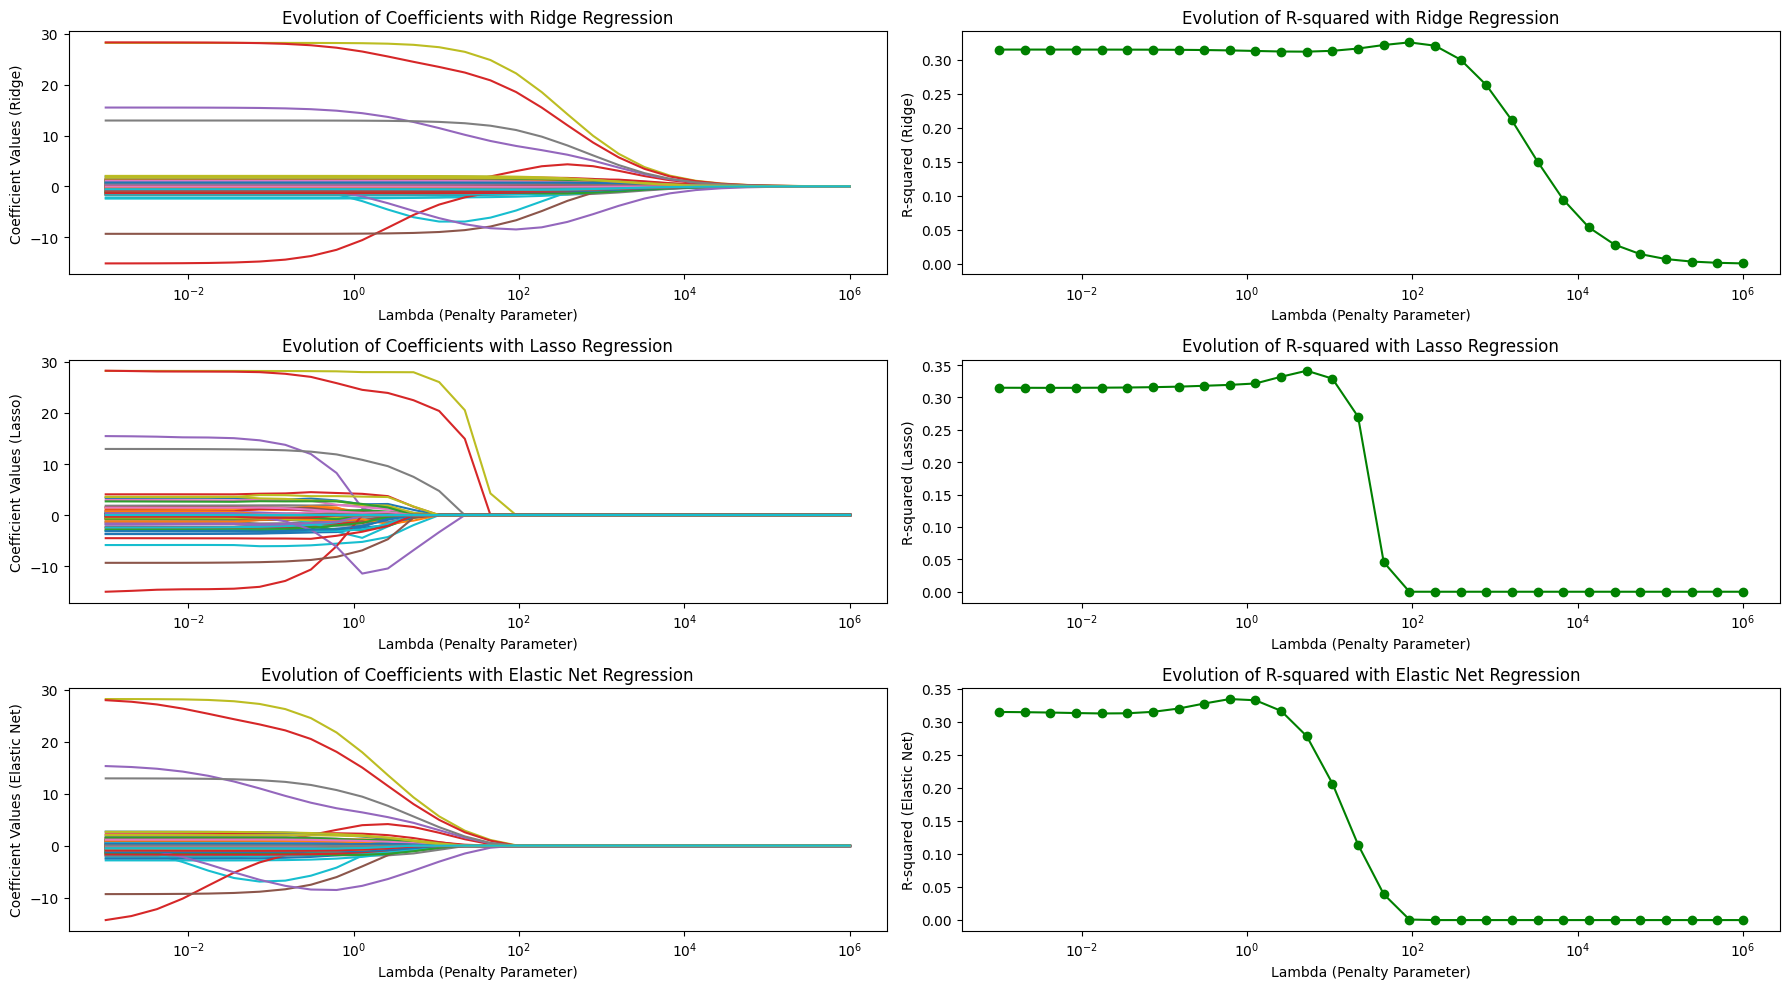

In [20]:
def evolution(r_type, X_train, y_train, X_test, y_test, lambda_list):
    """Evaluates the evolution of coefficients and R2 for different models."""
    theta_evolution = []
    r2_evolution = []

    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_test_std = scaler.transform(X_test)

    for lambdas in lambda_list:
        if r_type == 'Ridge':
            model = Ridge(alpha=lambdas, max_iter=40000)
        elif r_type == 'Lasso':
            model = Lasso(alpha=lambdas, max_iter=40000)
        elif r_type == 'Elastic_net':
            model = ElasticNet(alpha=lambdas, max_iter=40000)

        model.fit(X_train_std, y_train)
        theta_evolution.append(model.coef_)
        y_pred = model.predict(X_test_std)
        r2_evolution.append(r2_score(y_test, y_pred))

    return theta_evolution, r2_evolution

lambda_list = np.logspace(-3, 6, 30)

ridge_thetas, r2_ridge = evolution('Ridge', X_train_std, y_train, X_test_std, y_test, lambda_list)
lasso_thetas, r2_lasso = evolution('Lasso', X_train_std, y_train, X_test_std, y_test, lambda_list)
elastic_thetas, r2_elastic = evolution('Elastic_net', X_train_std, y_train, X_test_std, y_test, lambda_list)

# Plot the results
plt.figure(figsize=(18, 10))

plt.subplot(3, 2, 1)
plt.plot(lambda_list, np.array(ridge_thetas))
plt.xscale('log')
plt.xlabel('Lambda (Penalty Parameter)')
plt.ylabel('Coefficient Values (Ridge)')
plt.title('Evolution of Coefficients with Ridge Regression')

plt.subplot(3, 2, 2)
plt.plot(lambda_list, r2_ridge, marker='o', linestyle='-', color='g')
plt.xscale('log')
plt.xlabel('Lambda (Penalty Parameter)')
plt.ylabel('R-squared (Ridge)')
plt.title('Evolution of R-squared with Ridge Regression')

plt.subplot(3, 2, 3)
plt.plot(lambda_list, np.array(lasso_thetas))
plt.xscale('log')
plt.xlabel('Lambda (Penalty Parameter)')
plt.ylabel('Coefficient Values (Lasso)')
plt.title('Evolution of Coefficients with Lasso Regression')

plt.subplot(3, 2, 4)
plt.plot(lambda_list, r2_lasso, marker='o', linestyle='-', color='g')

plt.xscale('log')
plt.xlabel('Lambda (Penalty Parameter)')
plt.ylabel('R-squared (Lasso)')
plt.title('Evolution of R-squared with Lasso Regression')

plt.subplot(3, 2, 5)
plt.plot(lambda_list, np.array(elastic_thetas))
plt.xscale('log')
plt.xlabel('Lambda (Penalty Parameter)')
plt.ylabel('Coefficient Values (Elastic Net)')
plt.title('Evolution of Coefficients with Elastic Net Regression')

plt.subplot(3, 2, 6)
plt.plot(lambda_list, r2_elastic, marker='o', linestyle='-', color='g')
plt.xscale('log')
plt.xlabel('Lambda (Penalty Parameter)')
plt.ylabel('R-squared (Elastic Net)')
plt.title('Evolution of R-squared with Elastic Net Regression')

plt.tight_layout()
plt.show()

### PCR

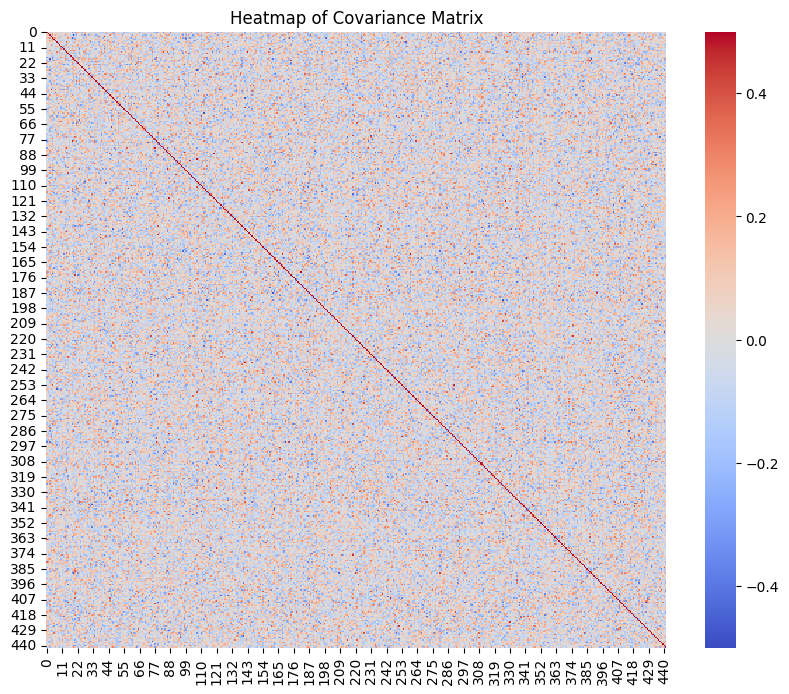

In [21]:
covariance_matrix = np.cov(X)

plt.figure(figsize=(10, 8))
vmax = 0.5
vmin = -0.5
sns.heatmap(covariance_matrix, cmap='coolwarm', vmax=vmax, vmin=vmin)
plt.title('Heatmap of Covariance Matrix')
plt.show()

In [22]:
U, s, Vt = np.linalg.svd(X, full_matrices=False)

[0.02562869 0.04817845 0.07005555 0.09166492 0.11307465 0.13431441
 0.1554451  0.17634239 0.1971532  0.21788564 0.23854678 0.25896406
 0.27934534 0.2995992  0.31971876 0.33970976 0.35959655 0.37933075
 0.39899618 0.41858701 0.43809024 0.45750445 0.47683502 0.49609083
 0.51524522 0.53434612 0.55341629 0.57241177 0.59126819 0.60991576
 0.62855271 0.64714873 0.66562752 0.68394646 0.70220318 0.72039826
 0.73853973 0.75653708 0.77445538 0.79227379 0.80996991 0.82761659
 0.84516297 0.86245626 0.87963599 0.89672125 0.91356254 0.93030708
 0.94682221 0.96239594 0.97554359 0.98163453 0.98635655 0.99041288
 0.99319338 0.99568756 0.99785778 0.99964047 0.99996213 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.       

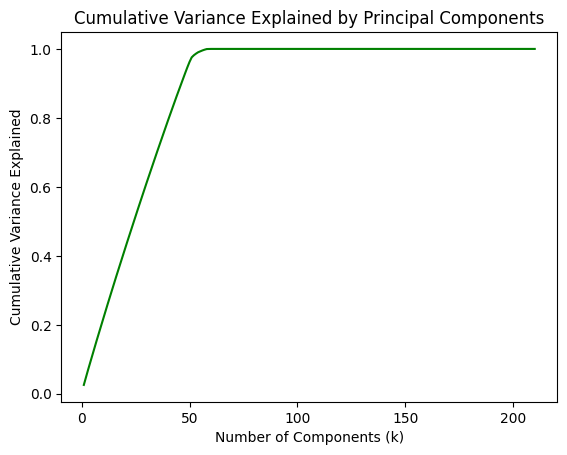

Number of components needed to explain more than 90% of the variance: 47


In [23]:
# Amount of variance explained by the first k components
cumulative_variance_ratio = np.cumsum(s**2) / np.sum(s**2)
print(cumulative_variance_ratio)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, color='g')
plt.xlabel('Number of Components (k)')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

explained_variance_threshold = 0.90
num_components_90_percent = np.argmax(cumulative_variance_ratio >= explained_variance_threshold) + 1

print(f"Number of components needed to explain more than 90% of the variance: {num_components_90_percent}")

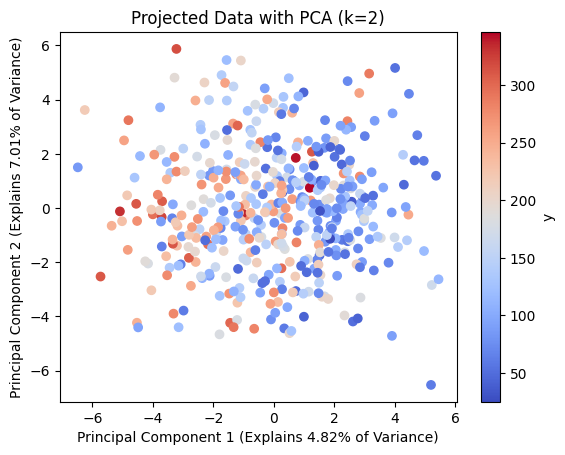

In [24]:
k = 2

projected_data = np.dot(X, Vt[:k, :].T)

plt.scatter(projected_data[:, 0], projected_data[:, 1], c=y, cmap='coolwarm')
plt.xlabel(f'Principal Component 1 (Explains {cumulative_variance_ratio[k-1]*100:.2f}% of Variance)')
plt.ylabel(f'Principal Component 2 (Explains {cumulative_variance_ratio[k]*100:.2f}% of Variance)')
plt.title('Projected Data with PCA (k=2)')
plt.colorbar(label='y')
plt.show()

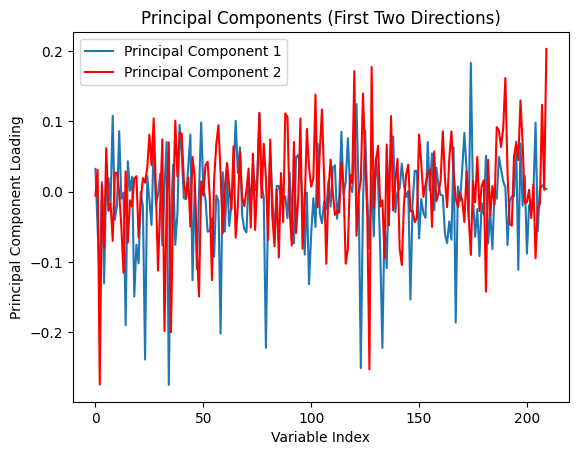

In [25]:
plt.plot(Vt[0, :], label='Principal Component 1')
plt.plot(Vt[1, :], label='Principal Component 2', color='r')
plt.xlabel('Variable Index')
plt.ylabel('Principal Component Loading')
plt.title('Principal Components (First Two Directions)')
plt.legend()
plt.show()

[0.17148482849707747, 0.17150260934451522, 0.17182741586904804, 0.1889504827929137, 0.19083148208646084, 0.20477700894635165, 0.21078617219801177, 0.21158482888432206, 0.212382890938148, 0.21888528190055967, 0.21889007769942537, 0.22015233961409786, 0.22292325571191063, 0.22400289539384466, 0.22403970165490528, 0.23025434583554538, 0.2358850480325556, 0.23915151518161692, 0.24524714050186647, 0.24894215950934562, 0.2494717822874084, 0.25355735805034096, 0.25383575312528184, 0.25390434827419994, 0.2542975683549994, 0.2609860086829521, 0.265395524276131, 0.26736874192383664, 0.2675329936079709, 0.26762692131463595, 0.26882953780715935, 0.26933144798734143, 0.2700559118569428, 0.270302118447753, 0.27052270964064706, 0.27704899118665327, 0.2792713288948432, 0.27983282368137297, 0.2802463869649826, 0.2802621787334467, 0.29239756756464663, 0.295182183225406, 0.2970766254926842, 0.29829778515128413, 0.2992502920990834, 0.31053121330105793, 0.31053139070153624, 0.3120191930360726, 0.3125492685

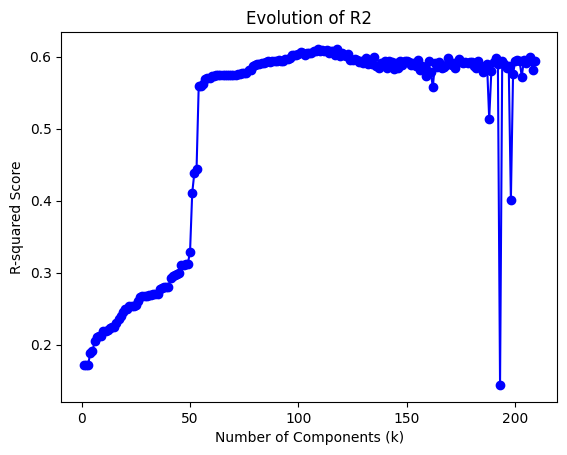

The best k for PCR is: 118


In [26]:
r2_scores = []
components = np.arange(1, 210)

for k in components:
    # Appliquer PCA avec k composantes
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X)

    # Entraîner le modèle de régression linéaire
    ols_model = LinearRegression()
    ols_model.fit(X_pca, y)

    # Prédire et calculer le score R2
    y_pred = ols_model.predict(X_pca)
    r2 = r2_score(y, y_pred)
    r2_scores.append(r2)

print(r2_scores)

plt.plot(components, r2_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components (k)')
plt.ylabel('R-squared Score')
plt.title('Evolution of R2')
plt.show()

best_k = components[np.argmax(r2_scores)]

print(f"The best k for PCR is: {best_k}")

### Comparison of the models

For OLS (MSE and R2): 4124.3959634846315 0.1692078272517269
For Ridge (MSE and R2): 3738.2276885565225 0.2469951161091518
For Lasso (MSE and R2): 3277.6566623862336 0.3397696234369184
For Elastic Net (MSE and R2): 3303.703547245382 0.3345229040973977


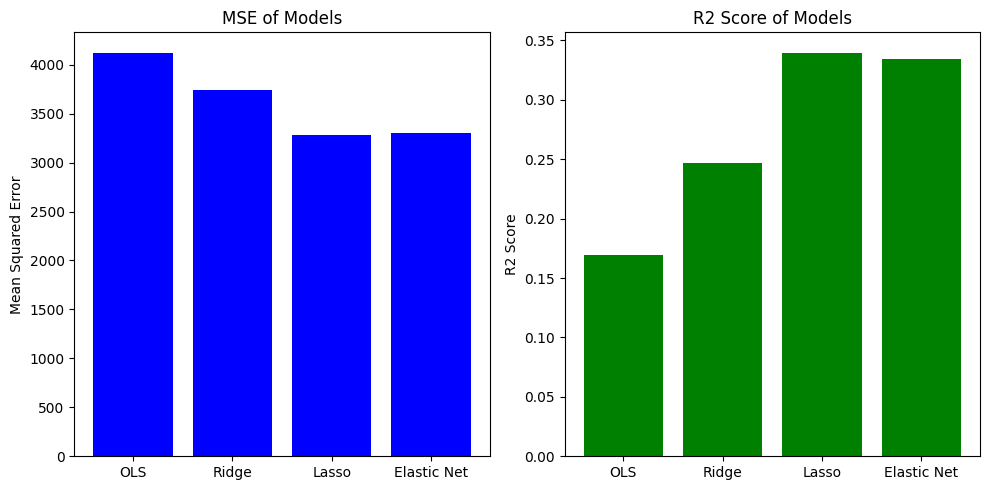

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

model_OLS = LinearRegression()
model_R = Ridge(alpha=10e2)
model_L = Lasso(alpha=4)
model_E = ElasticNet(alpha=1, l1_ratio=0.5)

model_OLS.fit(X_train_std, y_train)
model_R.fit(X_train_std, y_train)
model_L.fit(X_train_std, y_train)
model_E.fit(X_train_std, y_train)

mse_OLS = mean_squared_error(y_test, model_OLS.predict(X_test_std))
r2_OLS = r2_score(y_test, model_OLS.predict(X_test_std))
mse_R = mean_squared_error(y_test, model_R.predict(X_test_std))
r2_R = r2_score(y_test, model_R.predict(X_test_std))
mse_L = mean_squared_error(y_test, model_L.predict(X_test_std))
r2_L = r2_score(y_test, model_L.predict(X_test_std))
mse_E = mean_squared_error(y_test, model_E.predict(X_test_std))
r2_E = r2_score(y_test, model_E.predict(X_test_std))

print("For OLS (MSE and R2):", mse_OLS, r2_OLS)
print("For Ridge (MSE and R2):", mse_R, r2_R)
print("For Lasso (MSE and R2):", mse_L, r2_L)
print("For Elastic Net (MSE and R2):", mse_E, r2_E)

# Création des histogrammes
models = ['OLS', 'Ridge', 'Lasso', 'Elastic Net']
mses = [mse_OLS, mse_R, mse_L, mse_E]
r2s = [r2_OLS, r2_R, r2_L, r2_E]

plt.figure(figsize=(10, 5))

# Histogramme pour MSE
plt.subplot(1, 2, 1)
plt.bar(models, mses, color='blue')
plt.title('MSE of Models')
plt.ylabel('Mean Squared Error')

# Histogramme pour R2 Score
plt.subplot(1, 2, 2)
plt.bar(models, r2s, color='green')
plt.title('R2 Score of Models')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

Dans le contexte de ce jeu de données, les méthodes de régression Elastic Net et Lasso montrent des performances assez similaires, comme en témoignent leurs erreurs quadratiques moyennes (MSE) et leurs scores R2 comparables. Ces deux modèles suggèrent une pertinence dans la prédiction des données.